In [1]:
%%capture
!pip install openpyxl

In [1]:
import pandas as pd
import openpyxl
from rdflib import Namespace, Graph, URIRef, Literal, BNode
from rdflib.namespace import DCTERMS, DC, XSD, RDFS, DCAT, RDF, FOAF
import os
from datetime import datetime
import graphviz

g = Graph()
WD = Namespace("http://www.wikidata.org/entity/")
WDT = Namespace("http://www.wikidata.org/prop/direct/")

In [2]:
symbol = dict()
symbol["class"] = "oval"
symbol["datatype"] = "octagon"
symbol["literal"] = "rectangle"
symbol["uri"]="diamond"
symbol["bnode"]='point'
symbol["oneof"]='record'

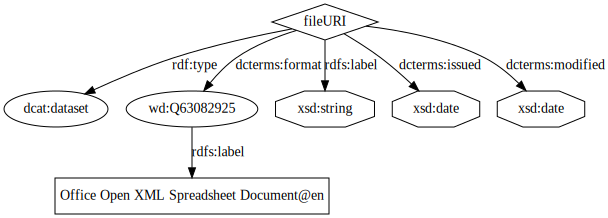

In [3]:
fileURI = URIRef("https://g-c8521c.81de.36fe.data.globus.org/Seewaldt/dt_Subramanian_ClinicalMetadata_mock_2022.07.12.xlsx")
filename = 'dt_Subramanian_ClinicalMetadata_mock_2022.07.12.xlsx'
schema = graphviz.Digraph(filename, filename=filename+'.gv')
# graphviz
schema.attr('node', shape=symbol["uri"])
schema.node('fileURI')
schema.attr('node', shape=symbol["class"])
schema.node('dcatdataset', label='dcat:dataset')
schema.node('Q63082925', label='wd:Q63082925')
schema.attr('node', shape=symbol["literal"])
schema.node('Office Open XML Spreadsheet Document@en')
schema.attr('node', shape='octagon')
schema.node('filename', label='xsd:string')
schema.node('filedatecreated', label='xsd:date')
schema.node('filedatemodified', label='xsd:date')
schema.edge('fileURI', 'dcatdataset', label='rdf:type')
schema.edge('fileURI', 'Q63082925', label='dcterms:format')
schema.edge('Q63082925', 'Office Open XML Spreadsheet Document@en', label='rdfs:label')
schema.edge('fileURI', 'filename', label="rdfs:label")
schema.edge('fileURI', 'filedatecreated', label="dcterms:issued")
schema.edge('fileURI', 'filedatemodified', label="dcterms:modified")

g.add((fileURI, RDF.type, DCAT.Dataset))
g.add((fileURI, DCTERMS.format, WD.Q63082925))
g.add((fileURI, RDFS.label, Literal(filename, datatype=XSD.string)))
datecreated = os.path.getctime(filename)
g.add((fileURI, DCTERMS.issued, Literal(datetime.fromtimestamp(datecreated).strftime('%Y-%m-%dT%H:%M:%S'), datatype=XSD.date)))
datemodified = os.path.getmtime(filename)
g.add((fileURI, DCTERMS.modified, Literal(datetime.fromtimestamp(datemodified).strftime('%Y-%m-%dT%H:%M:%S'), datatype=XSD.date)))

version = "0.2.0"
g.add((fileURI, DCTERMS.hasVersion, Literal(version, datatype=XSD.string)))

schema

In [4]:
print(g.serialize(format="turtle"))

@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://g-c8521c.81de.36fe.data.globus.org/Seewaldt/dt_Subramanian_ClinicalMetadata_mock_2022.07.12.xlsx> a dcat:Dataset ;
    rdfs:label "dt_Subramanian_ClinicalMetadata_mock_2022.07.12.xlsx"^^xsd:string ;
    dcterms:format <http://www.wikidata.org/entity/Q63082925> ;
    dcterms:issued "2022-10-04"^^xsd:date ;
    dcterms:modified "2022-07-15"^^xsd:date .




In [5]:
pd.set_option('display.max_columns', None)
xls = pd.ExcelFile('dt_Subramanian_ClinicalMetadata_mock_2022.07.12.xlsx')
subjects = pd.read_excel(xls, "Sheet2", header=1).head(3)
subjects

,Subject,Age (year of birth),Black (y/n),White (y/n),Asian (y/n),Indigenous (y/n),Carrbibean (y/n),Latina (y/n),Hispanic (y/n),Invasive CA,DCIS,LCIS,Atypia,Normal,Month,Year,T,N,M,ER,PR,HER2,Ki67 (%),BRCA1,BRCA2,other,Specific MT (text),High prob. Test negative,core Biopsy (y/n),Excisional biopsy,Mastectomy,Hypoxia time (mins),Formalin Fix Time,NACT (y/n),PARP-I y/n,Month.1,Year.1,Month.2,Year.2,Month.3,Date,Breast,Bone,Lung,Liver,BMI,HgbA1c,G,P,Date.1,Month.4,Pre,Peri,Post,Breast.1,TNBC,LBC,HER2+,Month Dx,Year Dx,Breast.2,DCIS/LCIS,Atypia.1,Month.5,Year.3,Premen BRCA,Post BRCA,OVCA,Male BrCA,BRCA1.1,BRCA2.1,PALB2,Other,Spec Mt (text_,Year.4,Date.2,Year.5,Date.3
0,COH-1,1959.0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,2021.0,1.0,1.0,0.0,1.0,0.0,0.0,83.0,1.0,0.0,0.0,CCCC,0.0,1.0,0.0,0.0,35.0,60.0,1.0,0.0,10.0,2021.0,6.0,2022.0,NaN,NaN,0.0,0.0,0.0,0.0,29.0,7.7,3.0,1.0,3.0,2020.0,1.0,0.0,0.0,1,0.0,0.0,0.0,12.0,2018.0,0.0,1.0,1.0,12.0,2016.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,CCCC,NaN,NaN,NaN,NaN
1,LSU-1,1972.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,CCCC,1.0,0.0,1.0,0.0,41.0,60.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,24.0,6.1,2.0,2.0,4.0,2019.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0,2015.0,7.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,CCCC,NaN,NaN,NaN,NaN
2,COH-2,1996.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2021.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,CCCC,0.0,0.0,0.0,1.0,22.0,60.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,35.0,6.9,1.0,1.0,7.0,2018.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,4.0,2017.0,1.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,CCCC,NaN,NaN,NaN,NaN


In [6]:
BASE = Namespace("http://idr.semscape.org/")
SUBJECT = Namespace(BASE.subject)
OBO = Namespace("http://purl.obolibrary.org/obo/")
g.bind("obo", "http://purl.obolibrary.org/obo/")
SCHEMA = Namespace("https://schema.org/")
SIO = Namespace("http://semanticscience.org/resource/")
NODE = Namespace("http://idr.semscape.org/nodeURI/")
CCF = Namespace("http://purl.org/ccf/")

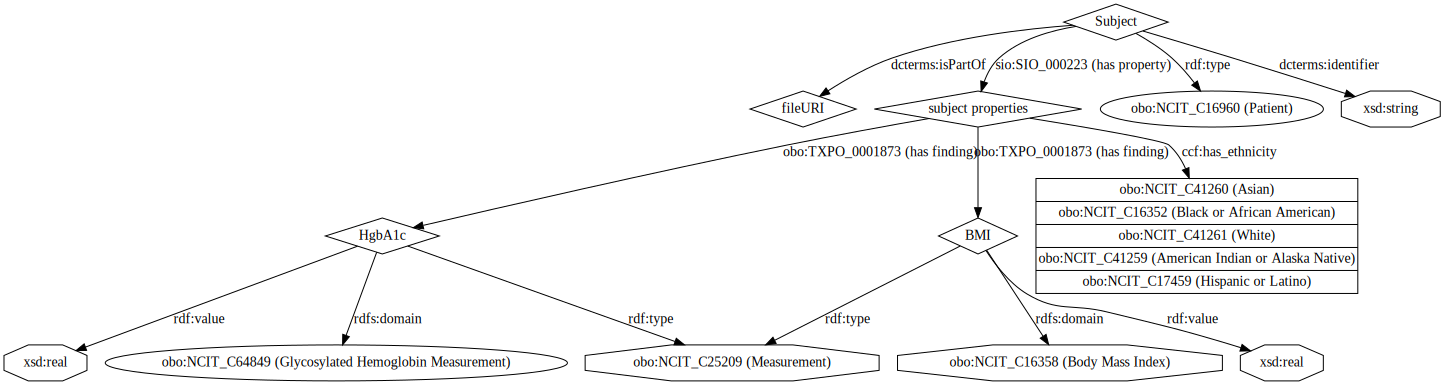

In [7]:
def add2graphviz(command=None, arg1=None, arg2=None, shape=None, label=None):
    if command == "attr":
        localviz.attr(arg1, shape=shape)
        schema.attr(arg1, shape=shape)
    if command == "node":
        localviz.node(arg1,label=label)
        schema.node(arg1,label=label)
    if command == "edge":
        localviz.edge(arg1, arg2, label=label)
        schema.edge(arg1, arg2, label=label)

localviz = graphviz.Digraph()
# uri
add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
# nodes
add2graphviz(command='node', arg1='subject', label="Subject")
add2graphviz(command='node', arg1='fileURI', label="fileURI")
add2graphviz(command='node', arg1='subjectProperties', label="subject properties")
add2graphviz(command='node', arg1='bmi', label='BMI')
add2graphviz(command='node', arg1='hgba1c', label='HgbA1c')

# class
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
# nodes
add2graphviz(command='node', arg1='NCIT_C16960', label="obo:NCIT_C16960 (Patient)")
add2graphviz(command='node', arg1='NCIT_C64849', label="obo:NCIT_C64849 (Glycosylated Hemoglobin Measurement)")
#datatype
add2graphviz(command='attr', arg1='node', shape=symbol["datatype"])
add2graphviz(command='node', arg1='subjectidentifier', label="xsd:string")
add2graphviz(command='node', arg1='NCIT_C25209',label='obo:NCIT_C25209 (Measurement)')
add2graphviz(command='node', arg1='NCIT_C16358', label='obo:NCIT_C16358 (Body Mass Index)')
add2graphviz(command='node', arg1='bmivalue', label='xsd:real')
add2graphviz(command='node', arg1='hgba1cvalue', label='xsd:real')
# oneof
add2graphviz(command='attr', arg1='node', shape=symbol['oneof'])
## nodes
add2graphviz(command='node', arg1='ethnicity', label="{ obo:NCIT_C41260 (Asian) | obo:NCIT_C16352 (Black or African American) | obo:NCIT_C41261 (White) | obo:NCIT_C41259 (American Indian or Alaska Native) | obo:NCIT_C17459 (Hispanic or Latino) }  ")
#edges
add2graphviz(command='edge', arg1='subject', arg2='fileURI', label='dcterms:isPartOf')
add2graphviz(command='edge', arg1='subject', arg2='NCIT_C16960', label='rdf:type')
add2graphviz(command='edge', arg1='subject', arg2='subjectidentifier', label='dcterms:identifier')
add2graphviz(command='edge', arg1='subject', arg2='subjectProperties', label='sio:SIO_000223 (has property)')
add2graphviz(command='edge', arg1='subjectProperties', arg2='ethnicity', label='ccf:has_ethnicity ')
add2graphviz(command='edge', arg1='subjectProperties', arg2='bmi', label='obo:TXPO_0001873 (has finding)')
add2graphviz(command='edge', arg1='bmi', arg2='NCIT_C25209', label='rdf:type')
add2graphviz(command='edge', arg1='bmi', arg2='NCIT_C16358', label='rdfs:domain')
add2graphviz(command='edge', arg1='bmi', arg2='bmivalue', label="rdf:value")
add2graphviz(command='edge', arg1='subjectProperties', arg2='hgba1c', label='obo:TXPO_0001873 (has finding)')
add2graphviz(command='edge', arg1='hgba1c', arg2='NCIT_C25209', label='rdf:type')
add2graphviz(command='edge', arg1='hgba1c', arg2='NCIT_C64849', label='rdfs:domain')
add2graphviz(command='edge', arg1='hgba1c', arg2='hgba1cvalue', label="rdf:value")

localviz

# Pregnancy history

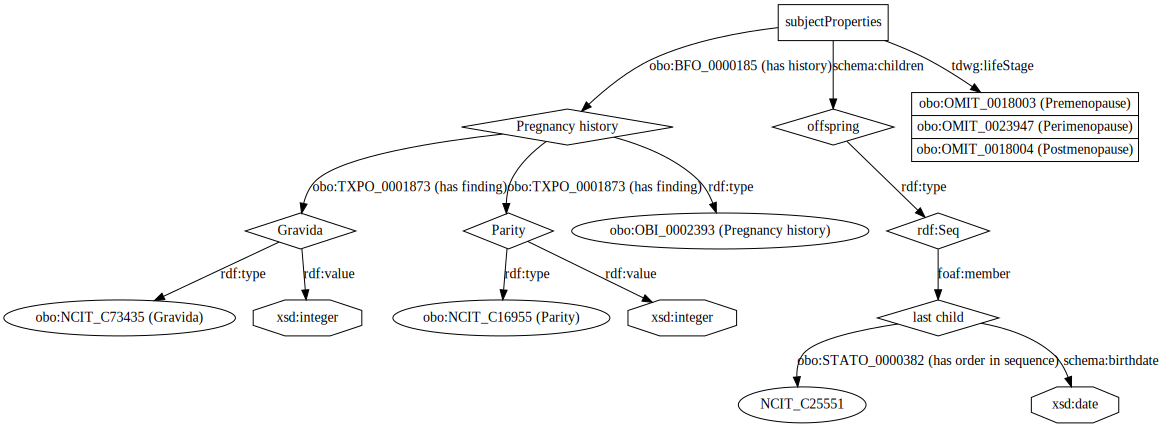

In [8]:
localviz = graphviz.Digraph()
# uri
add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
# nodes
add2graphviz(command='node', arg1='pregnancyhistory', label="Pregnancy history")
add2graphviz(command='node', arg1='gravida', label="Gravida")
add2graphviz(command='node', arg1='parity', label="Parity")
add2graphviz(command='node', arg1='offspring', label='offspring')
add2graphviz(command='node', arg1='partofoffspring', label='rdf:Seq')
add2graphviz(command='node', arg1='lastchild', label='last child')
#class
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
#nodes
add2graphviz(command='node', arg1='OBI_0002393', label="obo:OBI_0002393 (Pregnancy history)")
add2graphviz(command='node', arg1='NCIT_C73435', label="obo:NCIT_C73435 (Gravida)")
add2graphviz(command='node', arg1='NCIT_C16955', label="obo:NCIT_C16955 (Parity)")
add2graphviz(command='node', arg1='NCIT_C25551', arg2="obo:NCIT_C25551 (last)")
#datatype
add2graphviz(command='attr', arg1='node', shape=symbol["datatype"])
# nodes
add2graphviz(command='node', arg1='gravidavalue', label="xsd:integer")
add2graphviz(command='node', arg1='parityvalue', label="xsd:integer")
add2graphviz(command='node', arg1='lcbirthdate', label="xsd:date")

#oneof
add2graphviz(command='attr', arg1='node', shape=symbol["oneof"])
#nodes
add2graphviz(command='node', arg1='menopausestatus', label='{obo:OMIT_0018003 (Premenopause)| obo:OMIT_0023947 (Perimenopause) | obo:OMIT_0018004 (Postmenopause) }')

# edges
add2graphviz(command='edge', arg1='subjectProperties', arg2='pregnancyhistory', label='obo:BFO_0000185 (has history)')
add2graphviz(command='edge', arg1='pregnancyhistory', arg2='OBI_0002393', label='rdf:type')
add2graphviz(command='edge', arg1='pregnancyhistory', arg2='gravida', label="obo:TXPO_0001873 (has finding)")
add2graphviz(command="edge", arg1="gravida", arg2='NCIT_C73435', label="rdf:type")
add2graphviz(command="edge", arg1="gravida", arg2="gravidavalue", label="rdf:value")

add2graphviz(command="edge", arg1="pregnancyhistory", arg2="parity", label="obo:TXPO_0001873 (has finding)")
add2graphviz(command="edge", arg1="parity", arg2='NCIT_C16955', label="rdf:type")
add2graphviz(command="edge", arg1="parity", arg2="parityvalue", label="rdf:value")

add2graphviz(command="edge", arg1="subjectProperties", arg2="offspring", label="schema:children")
add2graphviz(command="edge", arg1="offspring", arg2="partofoffspring", label="rdf:type")
add2graphviz(command="edge", arg1="partofoffspring", arg2="lastchild", label="foaf:member")
add2graphviz(command="edge", arg1="lastchild", arg2="lcbirthdate", label="schema:birthdate")
add2graphviz(command="edge", arg1="lastchild", arg2="NCIT_C25551", label="obo:STATO_0000382 (has order in sequence)")

add2graphviz(command="edge", arg1="subjectProperties", arg2="menopausestatus", label="tdwg:lifeStage")

localviz

# Family history


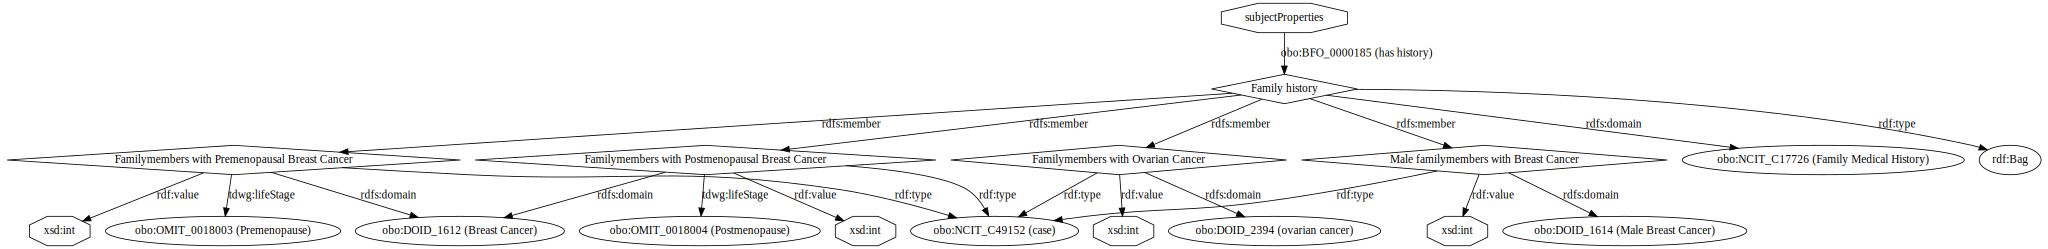

In [9]:
localviz = graphviz.Digraph()
# uri
add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
#nodes
add2graphviz(command='node', arg1='familyhistory', label="Family history")
add2graphviz(command='node', arg1='premenbrca', label="Familymembers with Premenopausal Breast Cancer")
add2graphviz(command='node', arg1='postbrca', label="Familymembers with Postmenopausal Breast Cancer")
add2graphviz(command='node', arg1='ovca', label="Familymembers with Ovarian Cancer")
add2graphviz(command='node', arg1='malebrca', label="Male familymembers with Breast Cancer")


# class
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
# nodes
add2graphviz(command='node', arg1='NCIT_C17726', label="obo:NCIT_C17726 (Family Medical History)")
add2graphviz(command='node', arg1='rdfBag', label='rdf:Bag')
add2graphviz(command='node', arg1='NCIT_C49152', label='obo:NCIT_C49152 (case)')
add2graphviz(command='node', arg1='DOID_1612', label='obo:DOID_1612 (Breast Cancer)')
add2graphviz(command='node', arg1='OMIT_0018003', label='obo:OMIT_0018003 (Premenopause)')
add2graphviz(command='node', arg1='OMIT_0018004', label='obo:OMIT_0018004 (Postmenopause)')
add2graphviz(command='node', arg1='DOID_2394', label='obo:DOID_2394 (ovarian cancer)')
add2graphviz(command='node', arg1='DOID_1614', label='obo:DOID_1614 (Male Breast Cancer)')

# datatype
add2graphviz(command='attr', arg1='node', shape=symbol["datatype"])
#nodes
add2graphviz(command="node", arg1="premenbrcavalue", label="xsd:int")
add2graphviz(command="node", arg1="postbrcavalue", label="xsd:int")
add2graphviz(command="node", arg1="ovcavalue", label="xsd:int")
add2graphviz(command="node", arg1="malebrcavalue", label="xsd:int")

#edges
add2graphviz(command='edge', arg1='subjectProperties', arg2='familyhistory', label="obo:BFO_0000185 (has history)")
add2graphviz(command='edge', arg1='familyhistory', arg2='NCIT_C17726', label="rdfs:domain")
add2graphviz(command='edge', arg1='familyhistory', arg2='rdfBag', label="rdf:type")

add2graphviz(command='edge', arg1='familyhistory', arg2='premenbrca', label="rdfs:member")
add2graphviz(command='edge', arg1='premenbrca', arg2='NCIT_C49152', label="rdf:type")
add2graphviz(command='edge', arg1="premenbrca", arg2='OMIT_0018003', label="tdwg:lifeStage")
add2graphviz(command='edge', arg1="premenbrca", arg2='premenbrcavalue', label="rdf:value")
add2graphviz(command='edge', arg1="premenbrca", arg2="DOID_1612", label="rdfs:domain")

add2graphviz(command='edge', arg1='familyhistory', arg2='postbrca', label="rdfs:member")
add2graphviz(command='edge', arg1='postbrca', arg2='NCIT_C49152', label="rdf:type")
add2graphviz(command='edge', arg1="postbrca", arg2='OMIT_0018004', label="tdwg:lifeStage")
add2graphviz(command='edge', arg1="postbrca", arg2='postbrcavalue', label="rdf:value")
add2graphviz(command='edge', arg1="postbrca", arg2="DOID_1612", label="rdfs:domain")

add2graphviz(command='edge', arg1='familyhistory', arg2='ovca', label="rdfs:member")
add2graphviz(command='edge', arg1='ovca', arg2='NCIT_C49152', label="rdf:type")
add2graphviz(command='edge', arg1="ovca", arg2='ovcavalue', label="rdf:value")
add2graphviz(command='edge', arg1="ovca", arg2="DOID_2394", label="rdfs:domain")

add2graphviz(command='edge', arg1='familyhistory', arg2='malebrca', label="rdfs:member")
add2graphviz(command='edge', arg1='malebrca', arg2='NCIT_C49152', label="rdf:type")
add2graphviz(command='edge', arg1="malebrca", arg2='malebrcavalue', label="rdf:value")
add2graphviz(command='edge', arg1="malebrca", arg2="DOID_1614", label="rdfs:domain")

localviz

# Genetic Testing

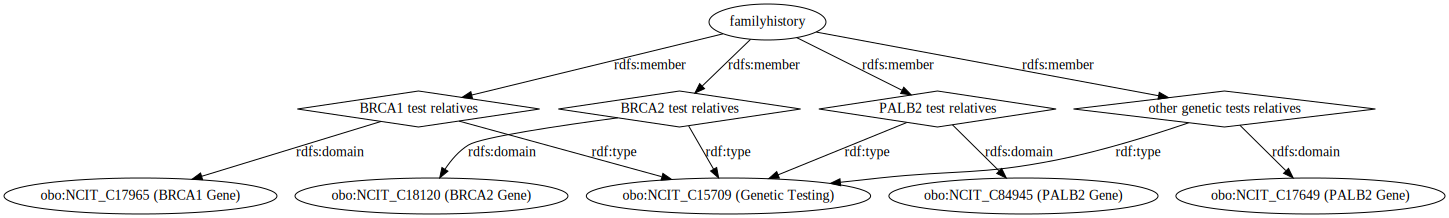

In [10]:
localviz = graphviz.Digraph()
# uri
add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
#nodes
add2graphviz(command='node', arg1='fambrca1test', label="BRCA1 test relatives")
add2graphviz(command='node', arg1='fambrca2test', label="BRCA2 test relatives")
add2graphviz(command='node', arg1='palb2test', label="PALB2 test relatives")
add2graphviz(command='node', arg1='othertest', label="other genetic tests relatives")

#classes
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
#nodes
add2graphviz(command="node", arg1="NCIT_C15709", label="obo:NCIT_C15709 (Genetic Testing)")
add2graphviz(command="node", arg1="NCIT_C17965", label="obo:NCIT_C17965 (BRCA1 Gene)")
add2graphviz(command="node", arg1="NCIT_C18120", label="obo:NCIT_C18120 (BRCA2 Gene)")
add2graphviz(command="node", arg1="NCIT_C84945", label="obo:NCIT_C84945 (PALB2 Gene)")
add2graphviz(command="node", arg1="NCIT_C17649", label="obo:NCIT_C17649 (PALB2 Gene)")


# edges
add2graphviz(command='edge', arg1='familyhistory', arg2='fambrca1test', label="rdfs:member")
add2graphviz(command='edge', arg1='fambrca1test', arg2='NCIT_C15709', label="rdf:type")
add2graphviz(command="edge", arg1="fambrca1test", arg2='NCIT_C17965', label="rdfs:domain")

add2graphviz(command='edge', arg1='familyhistory', arg2='fambrca2test', label="rdfs:member")
add2graphviz(command='edge', arg1='fambrca2test', arg2='NCIT_C15709', label="rdf:type")
add2graphviz(command="edge", arg1="fambrca2test", arg2='NCIT_C18120', label="rdfs:domain")

add2graphviz(command='edge', arg1='familyhistory', arg2='palb2test', label="rdfs:member")
add2graphviz(command='edge', arg1='palb2test', arg2='NCIT_C15709', label="rdf:type")
add2graphviz(command="edge", arg1="palb2test", arg2='NCIT_C84945', label="rdfs:domain")

add2graphviz(command='edge', arg1='familyhistory', arg2='othertest', label="rdfs:member")
add2graphviz(command='edge', arg1='othertest', arg2='NCIT_C15709', label="rdf:type")
add2graphviz(command="edge", arg1="othertest", arg2='NCIT_C17649', label="rdfs:domain")

localviz

# medical history

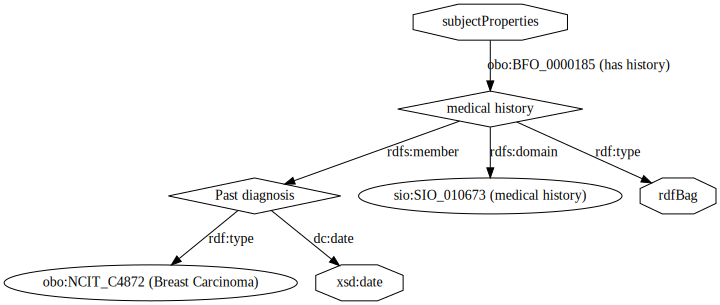

In [11]:
localviz = graphviz.Digraph()
# uri
add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
#nodes
add2graphviz(command='node', arg1="medicalhistory", label = "medical history")
add2graphviz(command='node', arg1="past_diagnosis", label = "Past diagnosis")
# classes
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
add2graphviz(command='node', arg1="SIO_010673", label= "sio:SIO_010673 (medical history)")
add2graphviz(command='node', arg1="NCIT_C4872", label= "obo:NCIT_C4872 (Breast Carcinoma)")

# datatypes
add2graphviz(command='attr', arg1='node', shape=symbol["datatype"])
# classes
add2graphviz(command='node', arg1="pastdataofdiagnosis", label= "xsd:date")

#edges
add2graphviz(command='edge', arg1="subjectProperties", arg2="medicalhistory", label="obo:BFO_0000185 (has history)")
add2graphviz(command='edge', arg1="medicalhistory", arg2="SIO_010673", label="rdfs:domain")
add2graphviz(command='edge', arg1="medicalhistory", arg2="rdfBag", label="rdf:type")
add2graphviz(command='edge', arg1="medicalhistory", arg2="past_diagnosis", label="rdfs:member")
add2graphviz(command='edge', arg1="past_diagnosis", arg2="NCIT_C4872", label="rdf:type")
add2graphviz(command='edge', arg1='past_diagnosis', arg2="pastdataofdiagnosis", label="dc:date")

localviz

# Archived Specimen

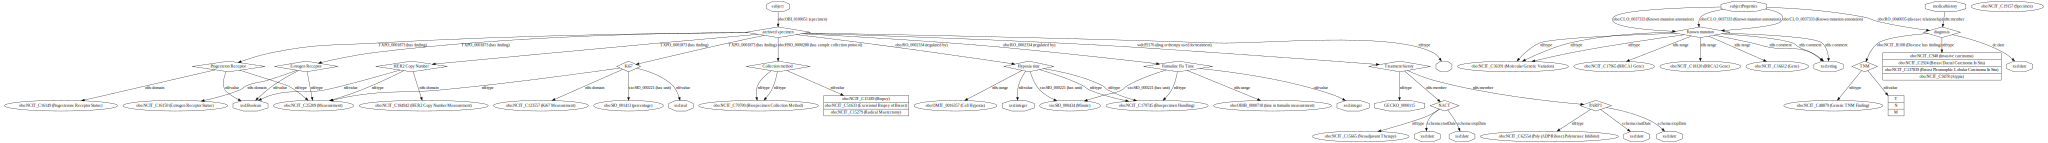

In [22]:
localviz = graphviz.Digraph()

add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
#nodes
add2graphviz(command='node', arg1="subjectArchivedSpecimen", label = "archived specimen")
add2graphviz(command='node', arg1="diagnosis", label = "diagnosis")
add2graphviz(command='node', arg1="tnmfinding", label = "TNM")
add2graphviz(command='node', arg1="er", label = "Estrogen Receptor")
add2graphviz(command='node', arg1="pr", label = "Progesteron Receptor")
add2graphviz(command='node', arg1="her", label = "HER2 Copy Number")
add2graphviz(command='node', arg1="ki67", label = "Ki67")
add2graphviz(command='node', arg1="collectionmethod", label = "Collection method")
add2graphviz(command='node', arg1="specimenHandlingHypoxiaTime", label = "Hypoxia time")
add2graphviz(command='node', arg1="specimenHandlingFormalineFixTime", label = "Formaline Fix Time")
add2graphviz(command='node', arg1="treatment_history", label = "Treatment history")
add2graphviz(command='node', arg1="nact_treatment", label = "NACT")
add2graphviz(command='node', arg1="parpi_treatment", label = "PARP I")
add2graphviz(command='node', arg1="known_mutation", label = "Known mutation")

#class
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
#nodes
add2graphviz(command='node', arg1="NCIT_C48879", label = "obo:NCIT_C48879 (Generic TNM Finding)")
add2graphviz(command='node', arg1="NCIT_C25209", label = "obo:NCIT_C25209 (Measurement)")
add2graphviz(command='node', arg1="NCIT_C16150", label = "obo:NCIT_C16150 (Estrogen Receptor Status)")
add2graphviz(command='node', arg1="NCIT_C16149", label = "obo:NCIT_C16149 (Progesterone Receptor Status)")
add2graphviz(command='node', arg1="NCIT_C184942", label = "obo:NCIT_C184942 (HER2 Copy Number Measurement)")
add2graphviz(command='node', arg1="NCIT_C123557", label = "obo:NCIT_C123557 (Ki67 Measurement)")
add2graphviz(command='node', arg1="SIO_001413", label = "obo:SIO_001413 (percentage)")
add2graphviz(command='node', arg1="NCIT_C70700", label = "obo:NCIT_C70700 (Biospecimen Collection Method)")
add2graphviz(command='node', arg1="NCIT_C179745", label = "obo:NCIT_C179745 (Biospecimen Handling)")
add2graphviz(command='node', arg1="OMIT_0016357", label = "obo:OMIT_0016357 (Cell Hypoxia)")
add2graphviz(command='node', arg1="SIO_000434", label = "sio:SIO_000434 (Minute)")
add2graphviz(command='node', arg1="OBIB_0000718", label="obo:OBIB_0000718 (time in formalin measurement)")
add2graphviz(command='node', arg1='NCIT_C15665', label="obo:NCIT_C15665 (Neoadjuvant Therapy)")
add2graphviz(command='node', arg1='NCIT_C62554', label="obo:NCIT_C62554 (Poly (ADP-Ribose) Polymerase Inhibitor)")
add2graphviz(command='node', arg1='NCIT_C36391', label="obo:NCIT_C36391 (Molecular Genetic Variation)")
add2graphviz(command='node', arg1='NCIT_C17965', label="obo:NCIT_C17965 (BRCA1 Gene)")
add2graphviz(command='node', arg1='NCIT_C18120', label="obo:NCIT_C18120 (BRCA2 Gene)")
add2graphviz(command='node', arg1='NCIT_C16612', label="obo:NCIT_C16612 (Gene)")
add2graphviz(command='node', arg1='NCIT_C19157', label="obo:NCIT_C19157 (Specimen)")


add2graphviz(command='attr', arg1='node', shape=symbol["oneof"])
add2graphviz(command='node', arg1="listofdisease", label = "{obo:NCIT_C948 (Invasive carcinoma) |obo:NCIT_C2924 (Breast Ductal Carcinoma In Situ) | obo:NCIT_C137839 (Breast Pleomorphic Lobular Carcinoma In Situ) | obo:NCIT_C9478 (Atypia)  }")
add2graphviz(command='node', arg1="tnmvalue", label = "{T | N | M  }")
add2graphviz(command="node", arg1='collectionmethodvalues', label="{obo:NCIT_C15189 (Biopsy) | obo:NCIT_C51633 (Excisional Biopsy of Breast) | obo:NCIT_C15279 (Radical Mastectomy) }")

# datatypes
add2graphviz(command='attr', arg1='node', shape=symbol["datatype"])
# nodes
add2graphviz(command='node', arg1="diagnosisdate", label= "xsd:date")
add2graphviz(command='node', arg1="boolean", label= "xsd:Boolean")
add2graphviz(command='node', arg1="ki67value", label= "xsd:real")
add2graphviz(command='node', arg1="specimenHandlingHypoxiaTimevalue", label= "xsd:integer")
add2graphviz(command='node', arg1="specimenHandlingFormalineFixTimevalue", label= "xsd:integer")
add2graphviz(command='node', arg1="nact_start_date", label= "xsd:date")
add2graphviz(command='node', arg1="nact_stop_date", label= "xsd:date")
add2graphviz(command='node', arg1="parp_start_date", label= "xsd:date")
add2graphviz(command='node', arg1="parp_stop_date", label= "xsd:date")
add2graphviz(command='node', arg1="specific_mt", label= "xsd:string")

add2graphviz(command='edge', arg1="subject", arg2="subjectArchivedSpecimen", label="obo:OBI_0100051 (specimen)")
add2graphviz(command='edge', arg1="subjectArchivedSpecimen", arg2="", label="rdf:type")

add2graphviz(command='edge', arg1="subjectProperties", arg2="diagnosis", label="obo:RO_0040035 (disease relationship)")
add2graphviz(command='edge', arg1="medicalhistory", arg2="diagnosis", label="rdfs:member")
add2graphviz(command='edge', arg1="diagnosis", arg2="listofdisease", label="rdf:type")
add2graphviz(command='edge', arg1="diagnosis", arg2="diagnosisdate", label="dc:date")

add2graphviz(command='edge', arg1='diagnosis', arg2='tnmfinding', label="obo:NCIT_R108 (Disease has finding)")
add2graphviz(command='edge', arg1='tnmfinding', arg2='NCIT_C48879', label="rdf:type")
add2graphviz(command='edge', arg1='tnmfinding', arg2='tnmvalue', label="rdf:value")

add2graphviz(command='edge', arg1='subjectArchivedSpecimen', arg2='er', label='TXPO_0001873 (has finding)')
add2graphviz(command='edge', arg1='er', arg2='NCIT_C25209', label='rdf:type')
add2graphviz(command='edge', arg1='er', arg2='NCIT_C16150', label='rdfs:domain')
add2graphviz(command='edge', arg1='er', arg2='boolean', label='rdf:value')

add2graphviz(command='edge', arg1='subjectArchivedSpecimen', arg2='pr', label='TXPO_0001873 (has finding)')
add2graphviz(command='edge', arg1='pr', arg2='NCIT_C25209', label='rdf:type')
add2graphviz(command='edge', arg1='pr', arg2='NCIT_C16149', label='rdfs:domain')
add2graphviz(command='edge', arg1='pr', arg2='boolean', label='rdf:value')

add2graphviz(command='edge', arg1='subjectArchivedSpecimen', arg2='her', label='TXPO_0001873 (has finding)')
add2graphviz(command='edge', arg1='her', arg2='NCIT_C25209', label='rdf:type')
add2graphviz(command='edge', arg1='her', arg2='NCIT_C184942', label='rdfs:domain')
add2graphviz(command='edge', arg1='her', arg2='boolean', label='rdf:value')

add2graphviz(command='edge', arg1='subjectArchivedSpecimen', arg2='ki67', label='TXPO_0001873 (has finding)')
add2graphviz(command='edge', arg1='ki67', arg2='NCIT_C25209', label='rdf:type')
add2graphviz(command='edge', arg1='ki67', arg2='NCIT_C123557', label='rdfs:domain')
add2graphviz(command='edge', arg1='ki67', arg2='ki67value', label='rdf:value')
add2graphviz(command='edge', arg1='ki67', arg2='SIO_001413', label='sio:SIO_000221 (has unit)')

add2graphviz(command="edge", arg1='subjectArchivedSpecimen', arg2='collectionmethod', label="obo:HSO_0000288 (has sample collection protocol)")
add2graphviz(command="edge", arg1='collectionmethod', arg2='NCIT_C70700', label="rdf:type" )
add2graphviz(command="edge", arg1='collectionmethod', arg2='collectionmethodvalues', label="rdf:value" )
add2graphviz(command="edge", arg1='collectionmethod', arg2='NCIT_C70700', label="rdf:type" )


add2graphviz(command='edge', arg1="subjectArchivedSpecimen", arg2='specimenHandlingHypoxiaTime', label="obo:RO_0002334 (regulated by)")
add2graphviz(command='edge', arg1='specimenHandlingHypoxiaTime', arg2='NCIT_C179745', label='rdf:type')
add2graphviz(command='edge', arg1='specimenHandlingHypoxiaTime', arg2='OMIT_0016357', label='rdfs:range')
add2graphviz(command='edge', arg1='specimenHandlingHypoxiaTime', arg2='NCIT_C179745', label='rdf:type')
add2graphviz(command='edge', arg1='specimenHandlingHypoxiaTime', arg2='specimenHandlingHypoxiaTimevalue', label='rdf:value')
add2graphviz(command='edge', arg1='specimenHandlingHypoxiaTime', arg2='SIO_000434', label='sio:SIO_000221 (has unit)') ## TODO check!!!

add2graphviz(command='edge', arg1="subjectArchivedSpecimen", arg2='specimenHandlingFormalineFixTime', label="obo:RO_0002334 (regulated by)")
add2graphviz(command='edge', arg1='specimenHandlingFormalineFixTime', arg2='NCIT_C179745', label='rdf:type')
add2graphviz(command='edge', arg1='specimenHandlingFormalineFixTime', arg2='OBIB_0000718', label='rdfs:range')
add2graphviz(command='edge', arg1='specimenHandlingFormalineFixTime', arg2='specimenHandlingFormalineFixTimevalue', label='rdf:value')
add2graphviz(command='edge', arg1='specimenHandlingFormalineFixTime', arg2='SIO_000434', label='sio:SIO_000221 (has unit)')

add2graphviz(command='edge', arg1='subjectArchivedSpecimen', arg2='treatment_history', label='wdt:P2176 (drug or therapy used for treatment)')
add2graphviz(command="edge", arg1='treatment_history', arg2='GECKO_0000115 ', label='rdf:type')

add2graphviz(command='edge', arg1='treatment_history', arg2='nact_treatment', label='rdfs:member')
add2graphviz(command='edge', arg1='treatment_history', arg2='parpi_treatment', label='rdfs:member')

add2graphviz(command='edge', arg1='nact_treatment', arg2='NCIT_C15665', label='rdf:type')
add2graphviz(command='edge', arg1='nact_treatment', arg2='nact_start_date', label='schema:startDate')
add2graphviz(command='edge', arg1='nact_treatment', arg2='nact_stop_date', label='schema:stopDate')

add2graphviz(command='edge', arg1='parpi_treatment', arg2='NCIT_C62554', label='rdf:type')
add2graphviz(command='edge', arg1='parpi_treatment', arg2='parp_start_date', label='schema:startDate')
add2graphviz(command='edge', arg1='parpi_treatment', arg2='parp_stop_date', label='schema:stopDate')

add2graphviz(command='edge', arg1='subjectProperties', arg2='known_mutation', label='obo:CLO_0037333 (Known mutation annotation)')
add2graphviz(command='edge', arg1='known_mutation', arg2='NCIT_C36391', label='rdf:type')
add2graphviz(command='edge', arg1='known_mutation', arg2='NCIT_C17965', label='rdfs:range')
add2graphviz(command='edge', arg1='known_mutation', arg2='specific_mt', label='rdfs:comment')

add2graphviz(command='edge', arg1='subjectProperties', arg2='known_mutation', label='obo:CLO_0037333 (Known mutation annotation)')
add2graphviz(command='edge', arg1='known_mutation', arg2='NCIT_C36391', label='rdf:type')
add2graphviz(command='edge', arg1='known_mutation', arg2='NCIT_C18120', label='rdfs:range')
add2graphviz(command='edge', arg1='known_mutation', arg2='specific_mt', label='rdfs:comment')

add2graphviz(command='edge', arg1='subjectProperties', arg2='known_mutation', label='obo:CLO_0037333 (Known mutation annotation)')
add2graphviz(command='edge', arg1='known_mutation', arg2='NCIT_C36391', label='rdf:type')
add2graphviz(command='edge', arg1='known_mutation', arg2='NCIT_C16612', label='rdfs:range')
add2graphviz(command='edge', arg1='known_mutation', arg2='specific_mt', label='rdfs:comment')

localviz.view()
localviz

In [13]:
for index, row in subjects.iterrows():
    # Row Subject
    g.add((SUBJECT["/"+row["Subject"]], DCTERMS.isPartOf, fileURI))
    g.add((SUBJECT["/"+row["Subject"]], RDF.type, OBO.NCIT_C16960))
    g.add((SUBJECT["/"+row["Subject"]], DCTERMS.identifier, Literal(row["Subject"], datatype=XSD.string)))
    
    subjectProperties = BNode()
    g.add((SUBJECT["/"+row["Subject"]], OBO.SIO_000223, subjectProperties))
    # Row Age
    g.add((subjectProperties, SCHEMA.birthDate, Literal(str(int(row["Age (year of birth)"])), datatype=XSD.date)))
    # Ethnicity
    if row["Asian (y/n)"] == 1:
        g.add((subjectProperties, CCF.has_ethnicity, OBO.NCIT_C41260))
    if row["Black (y/n)"] == 1:
        g.add((subjectProperties, CCF.has_ethnicity, OBO.NCIT_C16352))
    if row["White (y/n)"] == 1:
        g.add((subjectProperties, CCF.has_ethnicity, OBO.NCIT_C41261))
    if row["Indigenous (y/n)"] == 1:
        g.add((subjectProperties, CCF.has_ethnicity, OBO.NCIT_C41259))
    # Carrbibean (y/n) NA
    if row["Latina (y/n)"] == 1:
        g.add((subjectProperties, CCF.has_ethnicity, OBO.NCIT_C17459))
    if row["Hispanic (y/n)"] == 1:
        g.add((subjectProperties, CCF.has_ethnicity, OBO.NCIT_C17459))
      
    #BMI
    bmi = BNode()
    g.add((subjectProperties, OBO.TXPO_0001873, bmi))
    g.add((bmi, RDF.type, OBO.NCIT_C25209))
    g.add((bmi, RDFS.domain, OBO.NCIT_C16358))
    g.add((bmi, RDF.value, Literal(row["BMI"])))
    
    # HgbA1c
    hgba1c = BNode()
    g.add((subjectProperties, OBO.TXPO_0001873, hgba1c))
    g.add((hgba1c, RDF.type, OBO.NCIT_C25209))
    g.add((hgba1c, RDFS.domain, OBO.NCIT_C64849))
    g.add((hgba1c, RDF.value, Literal(row["HgbA1c"])))
    
    # Gravida, Parity and Birthhistory
    birthhistory = BNode()
    g.add((subjectProperties, OBO.BFO_0000185, birthhistory)) # has_history
    g.add((birthhistory, RDF.type, OBO.OBI_0002393)) # Pregnancy history
          
    # Gravida
    gravida = BNode()
    g.add((birthhistory, OBO.TXPO_0001873, gravida)) # TXPO_0001873
    g.add((gravida, RDF.type, OBO.NCIT_C73435)) # NCIT_C73435 = Gravida
    g.add((gravida, RDF.value, Literal(row["G"])))
          
    # Parity
    parity = BNode()
    g.add((birthhistory, OBO.TXPO_0001873, parity))
    g.add((parity, RDF.type, OBO.NCIT_C16955))
    g.add((parity, RDF.value, Literal(row["P"])))
    
    # Last delivery
    ## Offspring
    offspring = BNode()
    g.add((subjectProperties, SCHEMA.children, offspring))
    g.add((offspring, RDF.type, RDF.Seq))
    lastchild = BNode()
    g.add((offspring, FOAF.member, lastchild))
    g.add((lastchild, SCHEMA.birthDate, Literal(str(int(row["Date.1"]))+"-"+str(int(row["Month.4"]))))) # Typo Date.1 should be Year.x
    g.add((lastchild, OBO.STATO_0000382, OBO.NCIT_C25551))
    
    # Family history
    familyhistory = BNode()
    g.add((familyhistory, RDF.type, RDF.Bag))
    g.add((familyhistory, RDFS.domain, OBO.NCIT_C17726))
    g.add((subjectProperties, OBO.BFO_0000185, familyhistory))
    if row["Premen BRCA"] == 1:
        premenbrca = BNode()
        g.add((familyhistory, RDFS.member, premenbrca))
        g.add((premenbrca, RDF.type, OBO.NCIT_C49152))
        g.add((premenbrca, RDFS.domain, OBO.DOID_1612))
        g.add((premenbrca, URIRef("http://rs.tdwg.org/dwc/terms/lifeStage"), OBO.OMIT_0018003))
        g.add((premenbrca, RDF.value, Literal(int(row["Premen BRCA"]), datatype=XSD.int)))

    if row["Post BRCA"] == 1:
        postbrca = BNode()
        g.add((familyhistory, RDFS.member, postbrca))
        g.add((postbrca, RDF.type, OBO.NCIT_C49152))
        g.add((postbrca, RDFS.domain, OBO.DOID_1612))
        g.add((postbrca, URIRef("http://rs.tdwg.org/dwc/terms/lifeStage"), OBO.OMIT_0023947))
        g.add((postbrca, RDF.value, Literal(int(row["Post BRCA"]), datatype=XSD.int)))

    if row["OVCA"] == 1:
        ovca = BNode()
        g.add((familyhistory, RDFS.member, ovca))
        g.add((ovca, RDF.type, OBO.NCIT_C49152))
        g.add((ovca, RDFS.domain, OBO.DOID_2394))
        g.add((ovca, RDF.value, Literal(int(row["OVCA"]), datatype=XSD.int)))
        
    if row["Male BrCA"] == 1:
        malebrca = BNode()
        g.add((familyhistory, RDFS.member, malebrca))
        g.add((malebrca, RDF.type, OBO.NCIT_C15709))
        g.add((malebrca, RDFS.domain, OBO.DOID_1614))
        g.add((malebrca, RDF.value, Literal(int(row["OVCA"]), datatype=XSD.int)))

    if row["BRCA1.1"] == 1:
        fambrca1test = BNode()
        g.add((familyhistory, RDFS.member, fambrca1test))
        g.add((fambrca1test, RDF.type, OBO.NCIT_C15709))
        g.add((fambrca1test, RDFS.domain, OBO.NCIT_C17965))
         
    if row["BRCA2.1"] == 1:
        fambrca2test = BNode()
        g.add((familyhistory, RDFS.member, fambrca2test))
        g.add((fambrca1test, RDF.type, OBO.NCIT_C15709))
        g.add((fambrca2test, RDFS.domain, OBO.NCIT_C18120))
    if row["PALB2"] == 1:
        fampalb2test = BNode()
        g.add((familyhistory, RDFS.member, fampalb2test))
        g.add((fambrca1test, RDF.type, OBO.NCIT_C15709))
        g.add((fampalb2test, RDFS.domain, OBO.NCIT_C84945))
    if row["Other"] == 1:
        othertest = BNode()
        g.add((familyhistory, RDFS.member, othertest))
        g.add((othertest, RDF.type, OBO.NCIT_C15709))
        g.add((othertest, RDFS.domain, OBO.NCIT_C17649))
   
    # Prior Diagnosis
    medicalhistory = BNode()
    g.add((medicalhistory, RDF.type, RDF.Bag))
    g.add((medicalhistory, RDFS.domain, OBO.SIO_010673))
    g.add((subjectProperties, OBO.BFO_0000185, medicalhistory))
    if row["Breast.1"] == 1:
        past_diagnosis = BNode()
        g.add((medicalhistory, RDFS.member, past_diagnosis))
        g.add((past_diagnosis, RDF.type, OBO.NCIT_C4872))
        g.add((past_diagnosis, DC.date, Literal(str(int(row["Year  Dx"]))+"-"+str(int(row["Month Dx"])), datatype=XSD.date)))
      
    # Menopause
    ## premenopause
    if row["Pre"] == 1:
        g.add((subjectProperties, URIRef("http://rs.tdwg.org/dwc/terms/lifeStage"), OBO.OMIT_0018003))
    if row["Peri"] == 1:
        g.add((subjectProperties, URIRef("http://rs.tdwg.org/dwc/terms/lifeStage"), OBO.OMIT_0023947))
    if row["Post"] == 1:
        g.add((subjectProperties, URIRef("http://rs.tdwg.org/dwc/terms/lifeStage"), OBO.OMIT_0018004))

    subjectArchivedSpecimen = BNode()
    g.add((SUBJECT["/"+row["Subject"]], OBO.OBI_0100051, subjectArchivedSpecimen))
    g.add((subjectArchivedSpecimen, RDF.type, OBO.NCIT_C19157))
    
    #Diagnosis
    diagnosis = BNode()
    g.add((subjectArchivedSpecimen, OBO.RO_0040035, diagnosis))
    g.add((medicalhistory, RDFS.member, diagnosis))
    if row["Invasive CA"] == 1:
        g.add((diagnosis, RDF.type, OBO.NCIT_C9480)) # Invasive carcinoma
    if row["DCIS"] == 1:
        g.add((diagnosis, RDF.type, OBO.NCIT_C2924)) # DCIS
    if row["LCIS"] == 1:
        g.add((diagnosis, RDF.type, OBO.NCIT_C137839)) # LCIS = Breast Pleomorphic Lobular Carcinoma In Situ?
    if row["Atypia"] == 1:
        g.add((diagnosis, RDF.type, OBO.NCIT_C9478)) # Atypia
    g.add((diagnosis, DC.date, Literal(str(int(row["Year"]))+"-"+str(int(row["Month"])), datatype=XSD.date)))
 
    # How should "Normal" be interpreted?
    
    tfinding = BNode()
    g.add((diagnosis, OBO.NCIT_R108, tfinding))
    g.add((tfinding, RDF.type, OBO.NCIT_C48879))
    g.add((tfinding, RDF.value, Literal("T"+str(row["T"]), datatype=XSD.string)))
    
    nfinding = BNode()
    g.add((diagnosis, OBO.NCIT_R108, nfinding))
    g.add((nfinding, RDF.type, OBO.NCIT_C48879))
    g.add((nfinding, RDF.value, Literal("N"+str(row["N"]), datatype=XSD.string)))
    
    mfinding = BNode()
    g.add((diagnosis,OBO.NCIT_R108, mfinding))
    g.add((mfinding, RDF.type, OBO.NCIT_C48879))
    g.add((mfinding, RDF.value, Literal("M"+str(row["M"]), datatype=XSD.string)))
    
    # Expression
    if not pd.isna(row["ER"]):
        er = BNode()
        g.add((subjectArchivedSpecimen, OBO.TXPO_0001873, er))
        g.add((er, RDF.type, OBO.NCIT_C25209))
        g.add((er, RDFS.range, OBO.NCIT_C16150))
        if row["ER"] == 1:
            g.add((er, RDF.value, Literal(True)))
        if row["ER"] == 0:
            g.add((er, RDF.value, Literal(False)))
            
    if not pd.isna(row["PR"]):
        pr = BNode()
        g.add((subjectArchivedSpecimen, OBO.TXPO_0001873, pr))
        g.add((pr, RDF.type, OBO.NCIT_C25209))
        g.add((pr, RDFS.range, OBO.NCIT_C16149))
        if row["PR"] == 1:
            g.add((pr, RDF.value, Literal(True)))
        if row["PR"] == 0:
            g.add((pr, RDF.value, Literal(False)))
            
    if not pd.isna(row["HER2"]):
        her = BNode()
        g.add((subjectArchivedSpecimen, OBO.TXPO_0001873, her))
        g.add((her, RDF.type, OBO.NCIT_C25209))
        g.add((her, RDFS.range, OBO.NCIT_C184942))
        if row["HER2"] == 1:
            g.add((her, RDF.value, Literal(True)))
        if row["HER2"] == 0:
            g.add((her, RDF.value, Literal(False)))
    
    if not pd.isna(row["Ki67 (%)"]):
        ki67 = BNode()
        g.add((subjectArchivedSpecimen, OBO.TXPO_0001873, ki67))
        g.add((ki67, RDF.type, OBO.NCIT_C25209))
        g.add((ki67, RDF.value, Literal(row["Ki67 (%)"])))
        g.add((ki67, RDFS.range, OBO.NCIT_C123557))
        g.add((ki67, SIO.SIO_000221, SIO.SIO_001413))
        
            
    # collection method
    collectionmethod = BNode()
    g.add((subjectArchivedSpecimen, OBO.HSO_0000288, collectionmethod))
    g.add((collectionmethod, RDF.type, OBO.NCIT_C70700))
    if row["core Biopsy (y/n)"] == 1:
        g.add((collectionmethod, RDF.value, OBO.NCIT_C15189))
    if row["Excisional biopsy"] == 1:
        g.add((collectionmethod, RDF.value, OBO.NCIT_C51633))
    if row["Mastectomy"] == 1:
        g.add((collectionmethod, RDF.value, OBO.NCIT_C15279))
    
    # Hypoxia time (mins)
    specimenHandlingHypoxiaTime = BNode()
    g.add((subjectArchivedSpecimen, OBO.RO_0002334, specimenHandlingHypoxiaTime))
    g.add((specimenHandlingHypoxiaTime, RDF.type, OBO.NCIT_C179745))
    g.add((specimenHandlingHypoxiaTime, RDFS.range, OBO.OMIT_0016357))
    g.add((specimenHandlingHypoxiaTime, RDF.value, Literal(row["Hypoxia time (mins)"])))
    g.add((specimenHandlingHypoxiaTime, SIO.SIO_000221, SIO.SIO_000434)) # unit minutes

    # Formalin Fix Time (mins)
    specimenHandlingFormalineFixTime = BNode()
    g.add((subjectArchivedSpecimen, OBO.RO_0002334, specimenHandlingFormalineFixTime))
    g.add((specimenHandlingFormalineFixTime, RDF.type, OBO.NCIT_C179745))
    g.add((specimenHandlingFormalineFixTime, RDFS.range, OBO.OBIB_0000718))
    g.add((specimenHandlingFormalineFixTime, RDF.value, Literal(row["Formalin Fix Time"])))
    g.add((specimenHandlingFormalineFixTime, SIO.SIO_000221, SIO.SIO_000434)) # unit minutes
    
    # Mutations
    if row["BRCA1"] == 1:
        known_mutation = BNode()
        g.add((subjectProperties, OBO.CLO_0037333, known_mutation))
        g.add((known_mutation, RDF.type, OBO.NCIT_C36391))
        g.add((known_mutation, RDFS.range, OBO.NCIT_C17965))
        g.add((known_mutation, RDFS.comment, Literal(row["Specific MT (text)"])))
    if row["BRCA2"] == 1:
        known_mutation = BNode()
        g.add((subjectProperties, OBO.CLO_0037333, known_mutation))
        g.add((known_mutation, RDF.type, OBO.NCIT_C36391))
        g.add((known_mutation, RDFS.range, OBO.NCIT_C18120))
        g.add((known_mutation, RDFS.comment, Literal(row["Specific MT (text)"])))
    if row["other"] == 1:
        known_mutation = BNode()
        g.add((subjectProperties, OBO.CLO_0037333, known_mutation))
        g.add((known_mutation, RDF.type, OBO.NCIT_C36391))
        g.add((known_mutation, RDFS.range, OBO.NCIT_C16612))
        g.add((known_mutation, RDFS.comment, Literal(row["Specific MT (text)"])))
    
    # Treatment

    treatment_history = BNode()
    g.add((treatment_history, RDF.type, OBO.GECKO_0000115))
    if row["NACT (y/n)"] == 1:
        nact_treatment = BNode()
        g.add((treatment_history, RDFS.member, nact_treatment))
        g.add((subjectArchivedSpecimen, WDT.P2176, nact_treatment))
        g.add((nact_treatment, RDF.type, OBO.NCIT_C15665))
        if not pd.isna(row["Year.1"]):
            g.add((nact_treatment, SCHEMA.startDate, Literal(str(row["Year.1"])+"-"+str(row["Month.1"]), datatype=XSD.date)))
        if not pd.isna(row["Year.2"]):
            g.add((nact_treatment, SCHEMA.endDate, Literal(str(row["Year.2"])+"-"+str(row["Month.2"]), datatype=XSD.date)))
    if row["PARP-I y/n"] == 1:
        parpi_treatment = BNode()
        g.add((treatment_history, RDFS.member, parpi_treatment))
        g.add((subjectArchivedSpecimen, WDT.P2176, parpi_treatment))
        g.add((parpi_treatment, RDF.type, OBO.NCIT_C62554))
        if not pd.isna(row["Year.1"]):
            g.add((parpi_treatment, SCHEMA.startDate, Literal(str(row["Year.1"])+"-"+str(row["Month.1"]), datatype=XSD.date)))
        if not pd.isna(row["Year.2"]):
            g.add((parpi_treatment, SCHEMA.endDate, Literal(str(row["Year.2"])+"-"+str(row["Month.2"]), datatype=XSD.date)))

In [14]:
print(g.serialize(destination=filename+".ttl", format="turtle"))
print(g.serialize(format="turtle"))


[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ns1: <http://semanticscience.org/resource/> .
@prefix ns2: <http://rs.tdwg.org/dwc/terms/> .
@prefix ns3: <http://purl.org/ccf/> .
@prefix ns4: <http://www.wikidata.org/prop/direct/> .
@prefix obo: <http://purl.obolibrary.org/obo/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://idr.semscape.org/subject/COH-1> a obo:NCIT_C16960 ;
    obo:OBI_0100051 [ a obo:NCIT_C19157 ;
            obo:HSO_0000288 [ a obo:NCIT_C70700 ;
                    rdf:value obo:NCIT_C15189 ] ;
            obo:RO_0002334 [ a obo:NCIT_C179745 ;
                    ns1:SIO_000221 ns1:SIO_

In [15]:
for node in g.all_nodes():
    if isinstance(node, URIRef):
        try:
            g.parse(node)
        except:
            print(node)

http://purl.obolibrary.org/obo/DOID_2394
http://idr.semscape.org/subject/COH-2
http://idr.semscape.org/subject/LSU-1
http://purl.obolibrary.org/obo/SIO_010673
http://www.wikidata.org/entity/Q63082925
https://g-c8521c.81de.36fe.data.globus.org/Seewaldt/dt_Subramanian_ClinicalMetadata_mock_2022.07.12.xlsx
http://purl.obolibrary.org/obo/DOID_1614
http://idr.semscape.org/subject/COH-1
http://purl.obolibrary.org/obo/DOID_1612


# Extract schema

In [17]:
from shexer.shaper import Shaper
from shexer.consts import NT, TURTLE

q = "select ?class where { ?item rdf:type ?class }"
target_classes = []
x = g.query(q)
for target_class in x:
  if str(target_class["class"]) not in target_classes:
    target_classes.append(str(target_class["class"]))

shex_target_file = filename+".shex"

shaper = Shaper(target_classes=target_classes,
                rdflib_graph=g,
                input_format=TURTLE,
                )  # Default rdf:type
            
shaper.shex_graph(output_file=shex_target_file)


/Users/andra/projects/scheduled-bots/venv/lib/python3.8/site-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.0.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(


In [18]:
command = f"cat {filename}.shex"

In [19]:
!command

In [20]:
import os
os.system(command)

PREFIX : <http://weso.es/shapes/>
PREFIX brick: <https://brickschema.org/schema/Brick#>
PREFIX csvw: <http://www.w3.org/ns/csvw#>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcat: <http://www.w3.org/ns/dcat#>
PREFIX dcmitype: <http://purl.org/dc/dcmitype/>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX doap: <http://usefulinc.com/ns/doap#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX odrl: <http://www.w3.org/ns/odrl/2/>
PREFIX org: <http://www.w3.org/ns/org#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX prof: <http://www.w3.org/ns/dx/prof/>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX qb: <http://purl.org/linked-data/cube#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <https://schema.org/>
PREFIX sh: <http://www.w3.org/ns/shacl#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX ssn: <http

0

f: <http://www.wikidata.org/reference/>
PREFIX v: <http://www.wikidata.org/value/>
PREFIX wdtn: <http://www.wikidata.org/prop/direct-normalized/>
PREFIX p: <http://www.wikidata.org/prop/>
PREFIX ps: <http://www.wikidata.org/prop/statement/>
PREFIX psv: <http://www.wikidata.org/prop/statement/value/>
PREFIX psn: <http://www.wikidata.org/prop/statement/value-normalized/>
PREFIX pq: <http://www.wikidata.org/prop/qualifier/>
PREFIX pqv: <http://www.wikidata.org/prop/qualifier/value/>
PREFIX pqn: <http://www.wikidata.org/prop/qualifier/value-normalized/>
PREFIX pr: <http://www.wikidata.org/prop/reference/>
PREFIX prv: <http://www.wikidata.org/prop/reference/value/>
PREFIX prn: <http://www.wikidata.org/prop/reference/value-normalized/>
PREFIX wdno: <http://www.wikidata.org/prop/novalue/>
PREFIX vcard: <http://www.w3.org/2006/vcard/ns#>

:Dataset
{
   dcterms:format  @:Item  ;                                   # 100.0 %
   dcterms:issued  xsd:date  ;                                 # 100.0 %


In [45]:
schema.view()

'dt_Subramanian_ClinicalMetadata_mock_2022.07.12.xlsx.gv.pdf'